In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [39]:
img = cv2.imread(r"C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\Gal_Gadot\gal gadot_1.jpeg")
img.shape

(1461, 1170, 3)

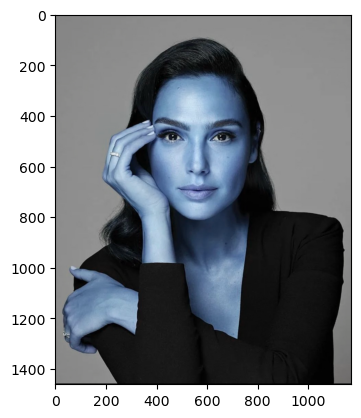

In [40]:
plt.imshow(img)

In [41]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1461, 1170)

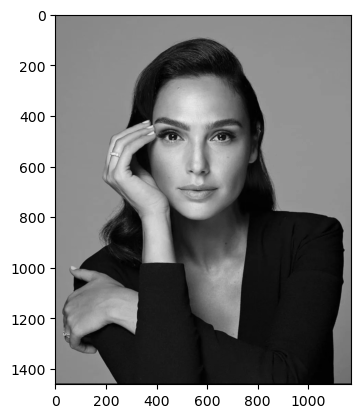

In [42]:
plt.imshow(gray, cmap='gray')

In [43]:
face_cascade = cv2.CascadeClassifier(r"C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\OpenCV\haarcascades\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(r"C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\OpenCV\haarcascades\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[328, 296, 481, 481]])

In [44]:
(x,y,w,h) = faces[0]
x,y,w,h

(328, 296, 481, 481)

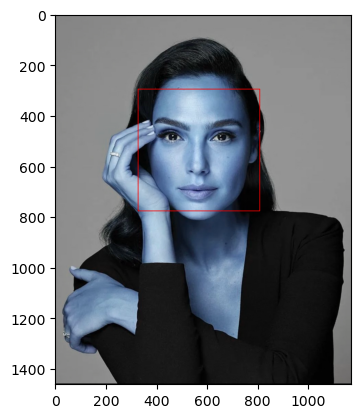

In [45]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (250,0,0), 2)
plt.imshow(face_img)

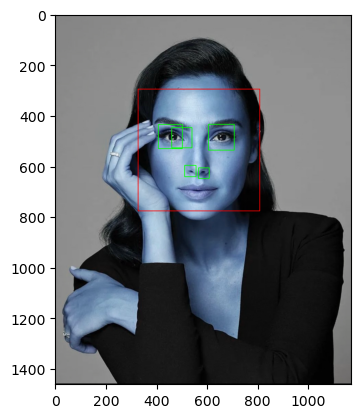

In [46]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

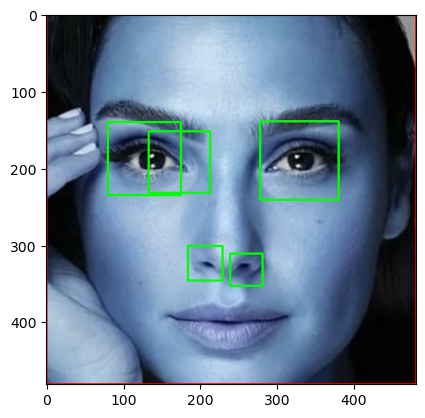

In [47]:
%matplotlib inline

plt.imshow(roi_color, cmap='gray')

In [48]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

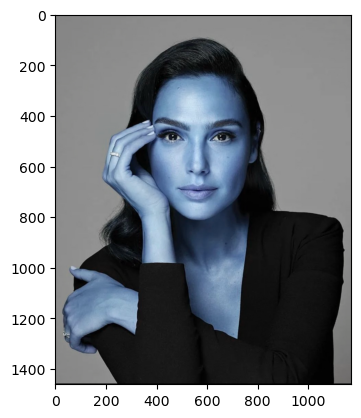

In [49]:
original_image = cv2.imread(r"C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\Gal_Gadot\gal gadot_1.jpeg")
plt.imshow(original_image)

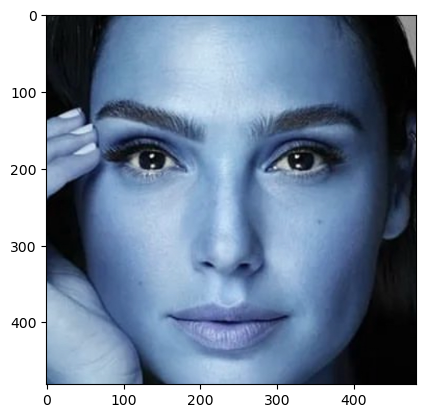

In [52]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\Gal_Gadot\gal gadot_1.jpeg")
plt.imshow(cropped_image)

In [53]:
path_to_data = r'C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images'
path_to_cr_data = r'C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\cropped_images'

In [56]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [57]:
img_dirs

['C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\Gal_Gadot',
 'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\Johnny_Depp',
 'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\Paul_Walker',
 'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\Shah_Rukh_Khan',
 'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\Tom_Cruise',
 'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\virat_kohli']

In [58]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [63]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + '\\' + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Gal_Gadot
Generating cropped images in folder:  C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\cropped_images\Gal_Gadot
Johnny_Depp
Generating cropped images in folder:  C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\cropped_images\Johnny_Depp
Paul_Walker
Generating cropped images in folder:  C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\cropped_images\Paul_Walker
Shah_Rukh_Khan
Generating cropped images in folder:  C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\cropped_images\Shah_Rukh_Khan
Tom_Cruise
Generating cropped images in folder:  C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\cropped_images\Tom_Cruise
virat_kohli
Generating cropped images in folder:  C:\Users\vibha\Machine Learning\ML_Projects\face_detection\model\datasets\images\cropped_images\virat_kohli


In [64]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

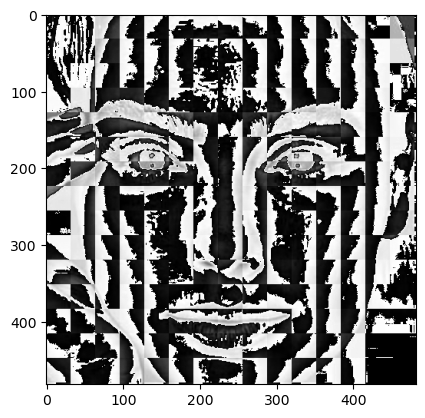

In [66]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [78]:
list(celebrity_file_names_dict.items())[0]

('Gal_Gadot',
 ['C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\cropped_images\\Gal_Gadot/Gal_Gadot1.png',
  'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\cropped_images\\Gal_Gadot/Gal_Gadot2.png',
  'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\cropped_images\\Gal_Gadot/Gal_Gadot3.png',
  'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\cropped_images\\Gal_Gadot/Gal_Gadot4.png',
  'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\cropped_images\\Gal_Gadot/Gal_Gadot5.png',
  'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\cropped_images\\Gal_Gadot/Gal_Gadot6.png',
  'C:\\Users\\vibha\\Machine Learning\\ML_Projects\\face_detection\\model\\datasets\\images\\cropped_images\\Gal_Gadot/Gal_Gadot7.png',
  'C:\\Users\\vibha\\Machine Learn

In [79]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Gal_Gadot': 0,
 'Johnny_Depp': 1,
 'Paul_Walker': 2,
 'Shah_Rukh_Khan': 3,
 'Tom_Cruise': 4,
 'virat_kohli': 5}

In [80]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [81]:
len(X)

311

In [88]:
X[0]

array([[24],
       [29],
       [30],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=uint8)

In [82]:
len(y)

311

In [87]:
y[0]

0

In [89]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(311, 4096)

In [90]:
X[0]

array([24., 29., 30., ...,  0.,  0.,  0.])

In [91]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

pipe = Pipeline([('scaler', StandardScaler()), ('scv', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8888888888888888

In [102]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.92      0.96        13
           2       0.90      0.82      0.86        11
           3       0.82      0.75      0.78        12
           4       0.86      0.92      0.89        13

    accuracy                           0.89        63
   macro avg       0.89      0.88      0.88        63
weighted avg       0.89      0.89      0.89        63



In [103]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [104]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [106]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.798367,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.653878,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.790531,{'logisticregression__C': 5}


In [113]:
best_estimators['svm'].score(X_test, y_test)

0.8888888888888888

In [114]:
best_estimators['random_forest'].score(X_test, y_test)

0.6984126984126984

In [115]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8888888888888888

In [116]:
best_clf = best_estimators['logistic_regression']

In [117]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[13,  0,  0,  0,  1],
       [ 1, 11,  1,  0,  0],
       [ 0,  0,  9,  2,  0],
       [ 0,  0,  1, 11,  0],
       [ 0,  0,  0,  1, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

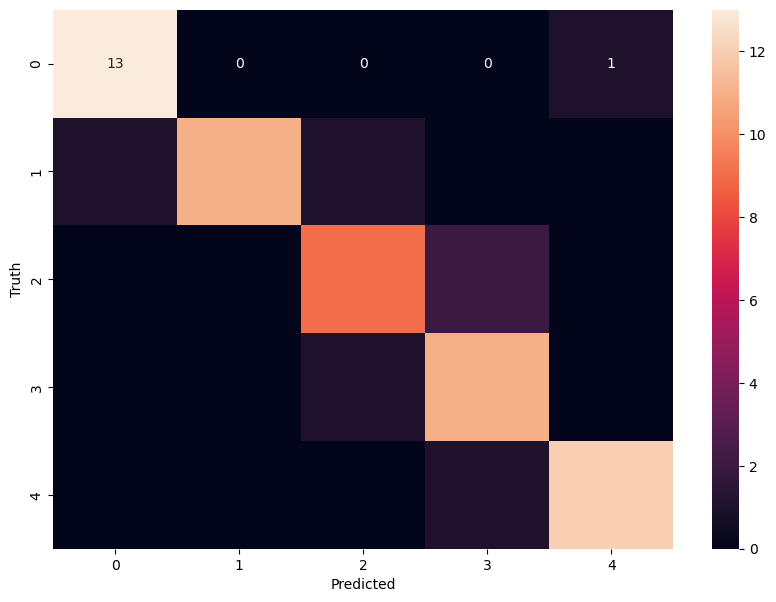

In [119]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [120]:
class_dict

{'Gal_Gadot': 0,
 'Johnny_Depp': 1,
 'Paul_Walker': 2,
 'Shah_Rukh_Khan': 3,
 'Tom_Cruise': 4,
 'virat_kohli': 5}

In [121]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [122]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))